In [1]:
import numpy as np
import pandas as pd
import missingno as mi
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import dabl

pd.options.display.float_format = '{:,.2f}'.format

xl = pd.ExcelFile("dadosqca.xlsx")
xl.sheet_names

['Brutos', 'Fuzzy']

In [2]:
df = xl.parse("Brutos")#, index_col='CASOS')
# Viewing dimensions
print(df.shape)
print(df.dtypes)

(90, 7)
CD        float64
LEG       float64
REC       float64
S_INC     float64
T_INC       int64
TEC         int64
RESULT      int64
dtype: object


In [3]:
# Data type of features
outputs = ['RESULT']
inputs = ['CD', 'LEG', 'REC', 'S_INC', 'T_INC', 'TEC']
df[list(outputs)] = df[list(outputs)].astype(str)
df[list(inputs)] = df[list(inputs)].astype(float)
print(df.dtypes)
df.describe()

CD        float64
LEG       float64
REC       float64
S_INC     float64
T_INC     float64
TEC       float64
RESULT     object
dtype: object


CD   LEG   REC  S_INC  T_INC   TEC
count 90.00 90.00 90.00  90.00  90.00 90.00
mean   4.03  4.60  3.75   3.86   5.51  0.62
std    0.73  0.61  0.77   1.04   4.59  0.49
min    1.31  1.00  1.72   1.00   0.00  0.00
25%    3.73  4.49  3.31   3.00   2.00  0.00
50%    4.14  4.84  3.93   4.00   5.00  1.00
75%    4.55  5.00  4.21   5.00   7.00  1.00
max    5.00  5.00  5.00   5.00  25.00  1.00

In [4]:
dabl.clean(df, verbose=2).head(2)

Detected feature types:
continuous      4
dirty_float     0
low_card_int    1
categorical     2
date            0
free_string     0
useless         0
dtype: int64


CD  LEG  REC  S_INC  T_INC  TEC RESULT
0 3.12 4.33 2.11   3.00   3.00  0.0      1
1 3.34 4.85 3.41   4.00   3.00  0.0      1

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("exploratory analysis brutos.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Importing 
import sweetviz as sv
# Analyzing & Display the
sweetviz_report = sv.analyze(df)
sweetviz_report.show_html('graficos univariados brutos.html')

                                             |          | [  0%]   00:00 -> (? left)

Report graficos univariados brutos.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (90, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
   

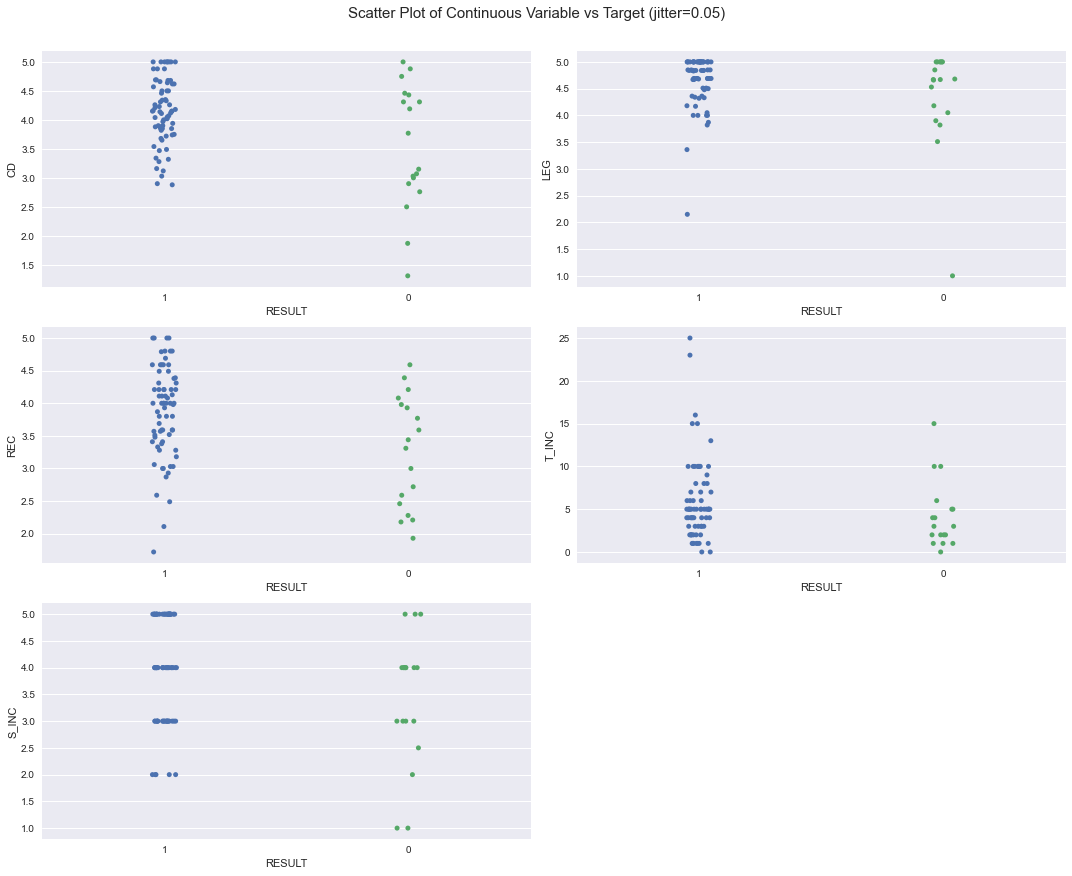

Using Lowess Smoothing. This might take a few minutes for large data sets...
Total Number of Scatter Plots = 15


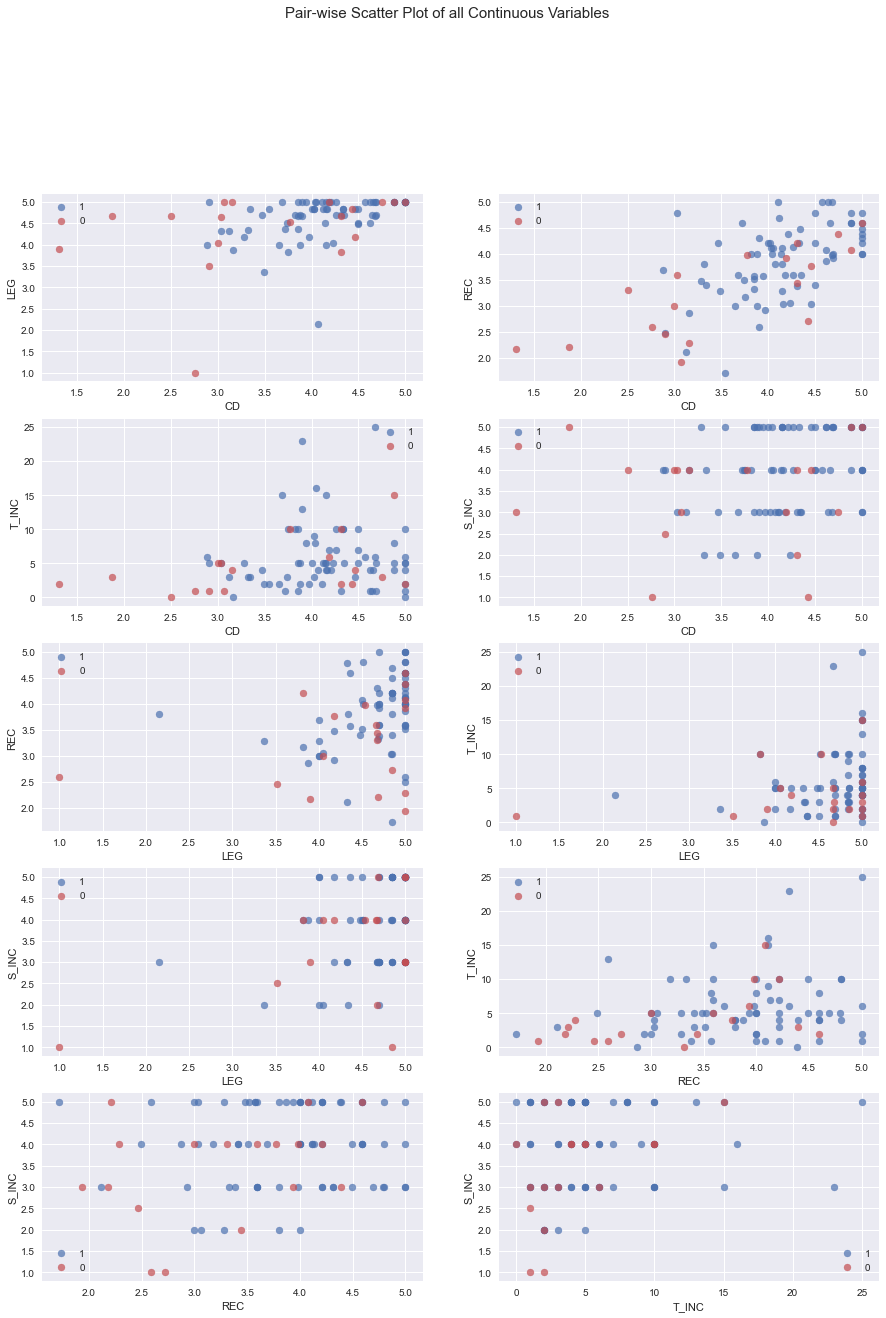

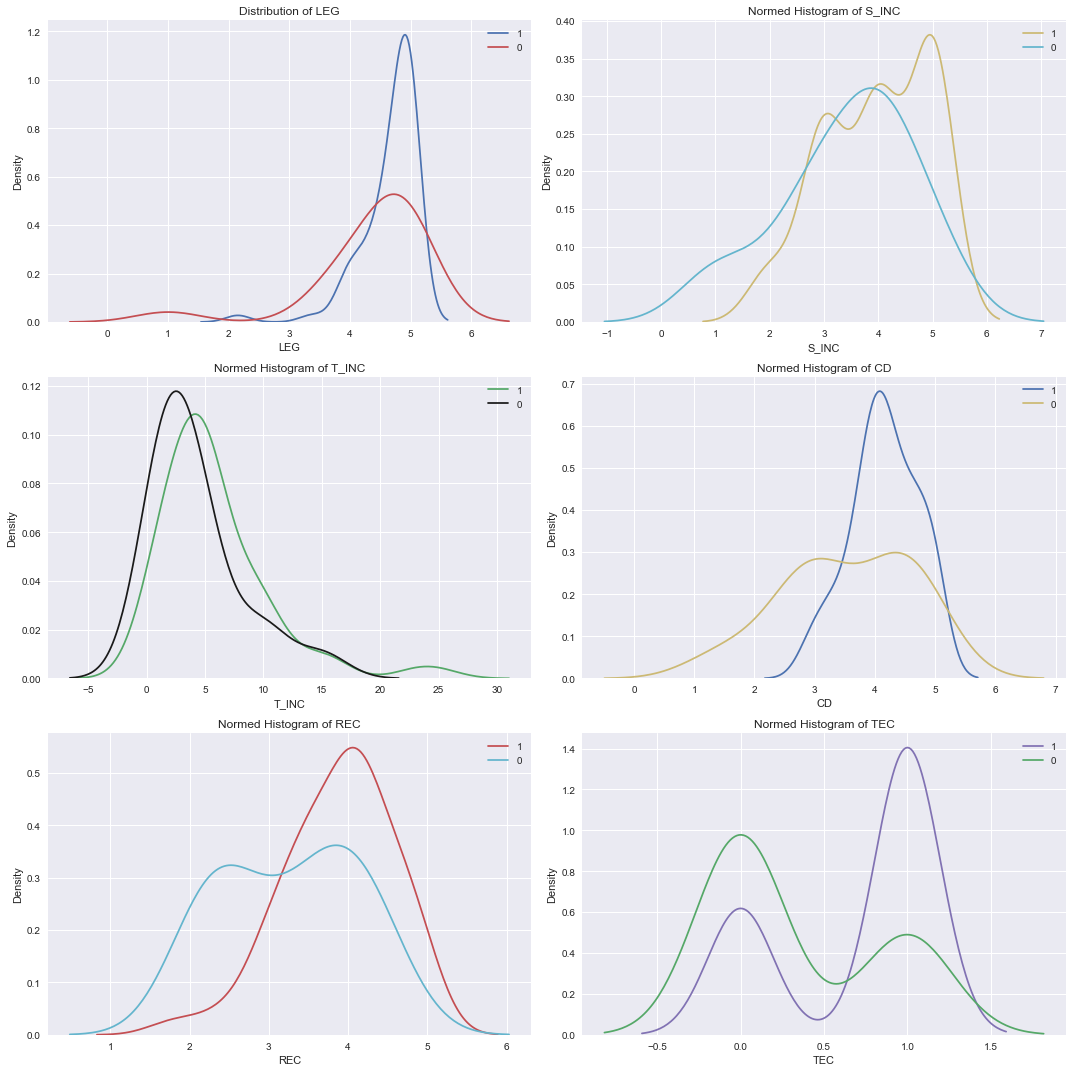

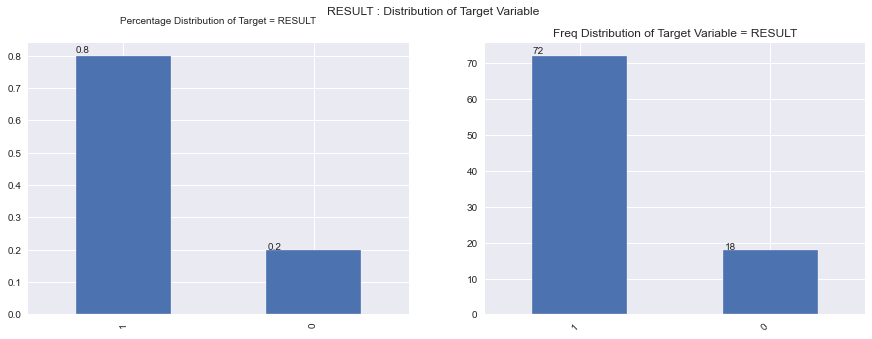

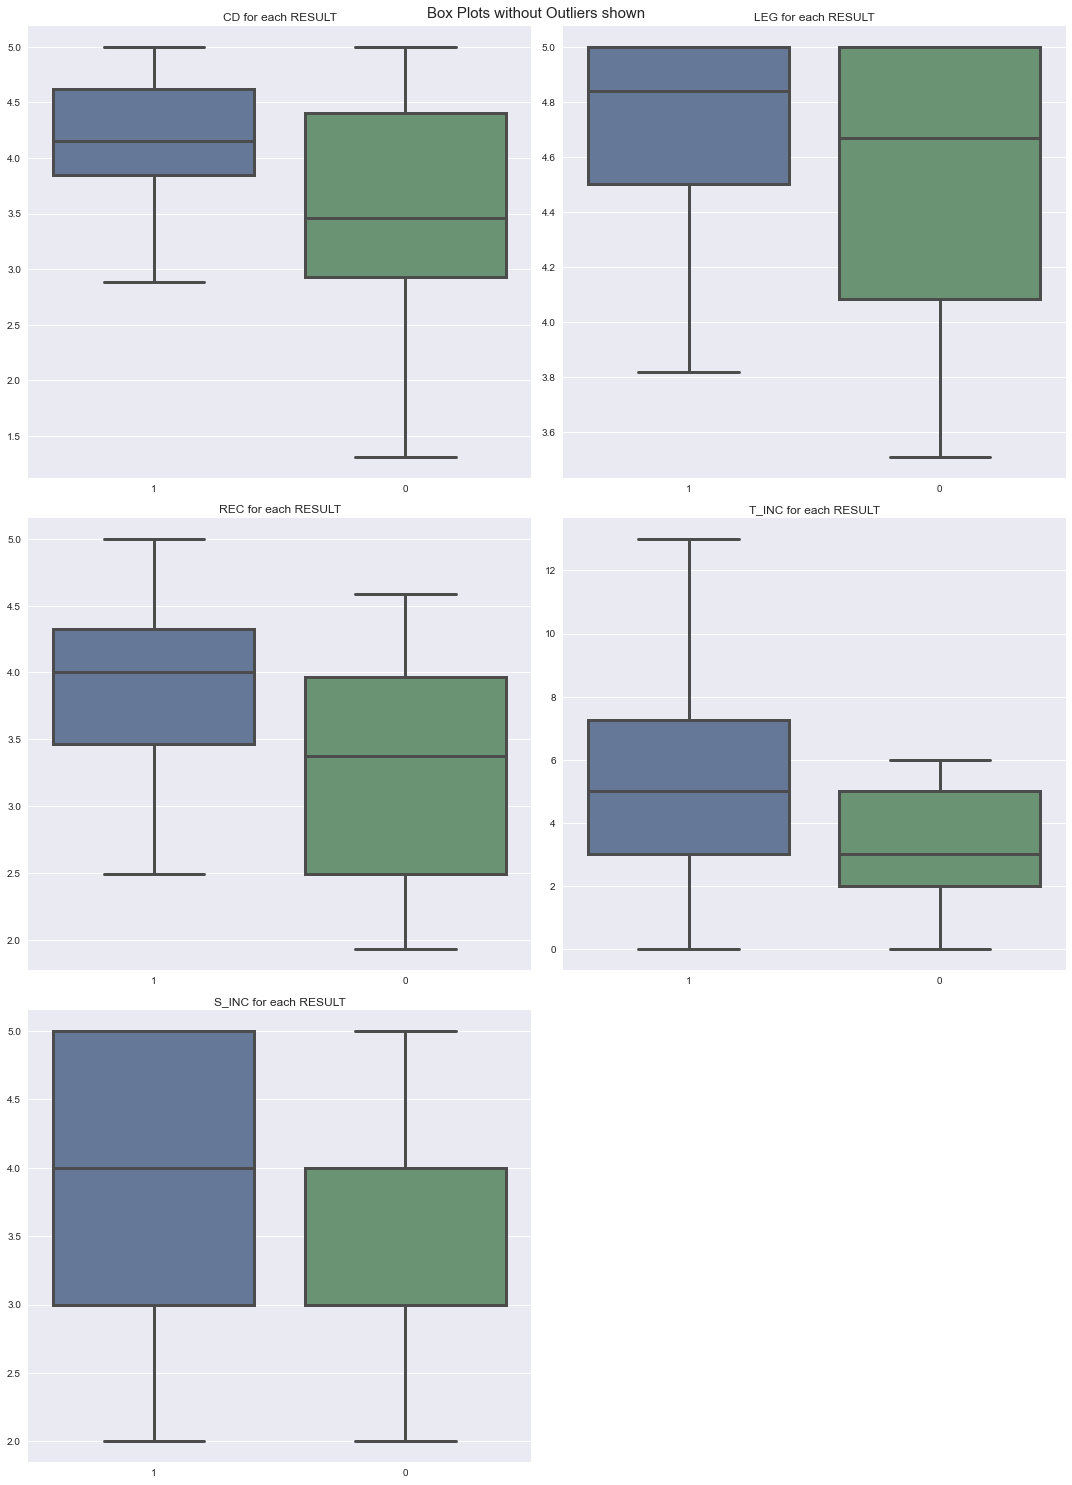

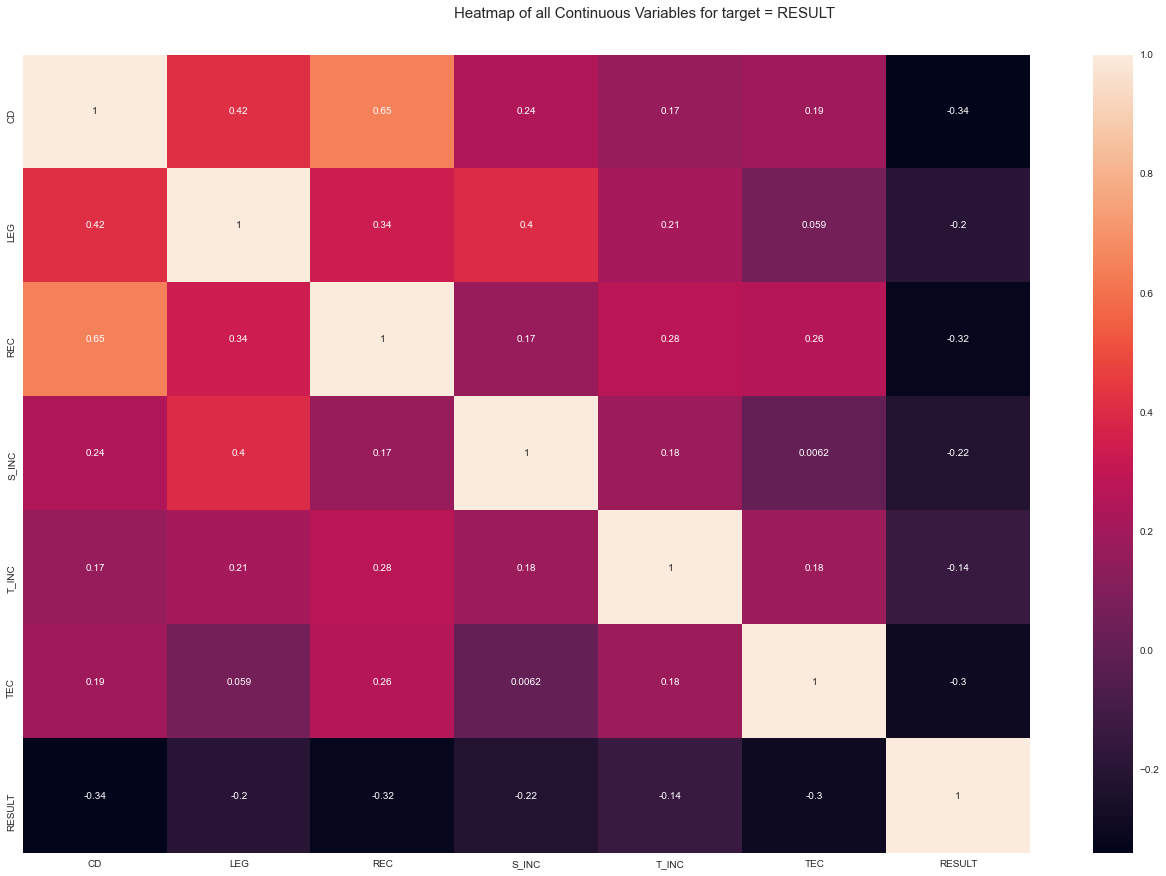

No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz (in seconds) = 5.388

 ###################### VISUALIZATION Completed ########################


In [8]:
# Importing 
from autoviz.AutoViz_Class import AutoViz_Class
# Analyzing & Display the report
AV = AutoViz_Class()
dft = AV.AutoViz(filename='', sep=',', dfte=df, depVar='RESULT', lowess=True)

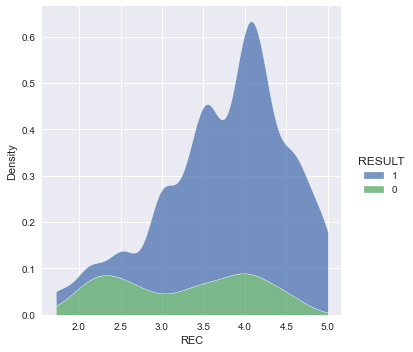

In [10]:
sns.displot(df, x='REC', kind='kde', hue='RESULT',
            bw_adjust=.5, multiple='stack', fill=True, cut=0)

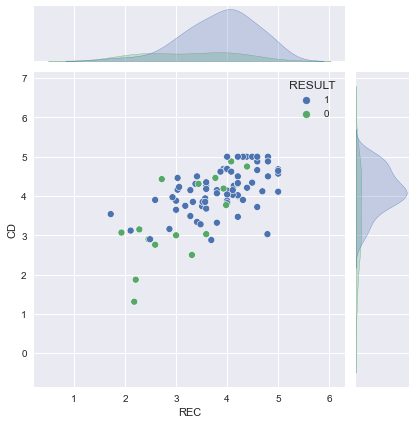

In [11]:
sns.jointplot(data=df, x="REC", y="CD", hue="RESULT")

CD  LEG  REC  S_INC  T_INC  TEC RESULT
0 3.12 4.33 2.11   3.00   3.00 0.00      1
1 3.34 4.85 3.41   4.00   3.00 0.00      1
2 3.74 4.50 3.51   4.00   3.00 1.00      1
3 4.21 5.00 4.39   5.00   4.00 0.00      1
4 4.66 5.00 4.59   4.00   4.00 0.00      1

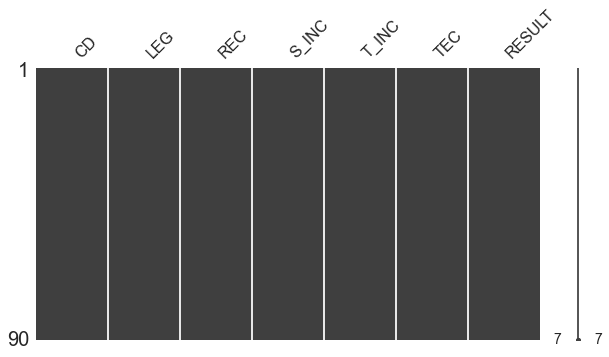

In [12]:
#plot missing data
mi.matrix(df, figsize = (10,5));
df.head(5)

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif
pd.options.plotting.backend = "plotly"

y = np.ravel(df[outputs])
X = df[inputs]

X.head(5)

CD  LEG  REC  S_INC  T_INC  TEC
0 3.12 4.33 2.11   3.00   3.00 0.00
1 3.34 4.85 3.41   4.00   3.00 0.00
2 3.74 4.50 3.51   4.00   3.00 1.00
3 4.21 5.00 4.39   5.00   4.00 0.00
4 4.66 5.00 4.59   4.00   4.00 0.00

In [14]:
#which technique of estimation // Classifier selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = GradientBoostingClassifier(n_estimators=3, learning_rate=0.01,
    max_depth=2, random_state=1).fit(X_train, y_train)
clf.score(X_test, y_test)
#clf

0.8888888888888888

In [15]:
from scipy.stats import randint
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence

rng = np.random.RandomState(0)

clf = RandomForestClassifier(n_estimators=10, random_state=rng)

param_dist = {"max_depth": [1, 7],
              "max_features": randint(1, 7),
              "min_samples_split": randint(1, 15),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

rsh = HalvingRandomSearchCV(estimator=clf, param_distributions=param_dist,
                            factor=2, random_state=rng)
rsh.fit(X, y)
rsh.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': 1,
 'min_samples_split': 9}

0.8125


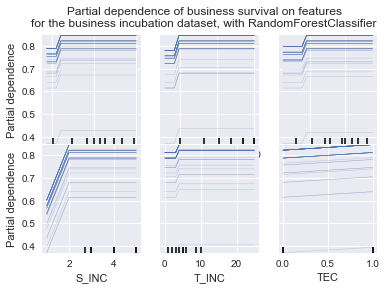

In [16]:
print(rsh.best_score_)

features = inputs
display = plot_partial_dependence(
       rsh, X, features, kind="individual", subsample=50,
       n_jobs=3, grid_resolution=20, random_state=0
)
display.figure_.suptitle(
    'Partial dependence of business survival on features\n'
    'for the business incubation dataset, with RandomForestClassifier'
)
display.figure_.subplots_adjust(hspace=0.01)

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import PolynomialCountSketch

linear_baseline = make_pipeline(MinMaxScaler(),
                                LogisticRegression(max_iter=1000))

linear_baseline.fit(X_train, y_train).score(X_test, y_test)

0.8333333333333334

In [18]:
pipe = make_pipeline(MinMaxScaler(),
                     PolynomialCountSketch(degree=2, n_components=10),
                     LogisticRegression(solver='saga', max_iter=10000))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60,
                                                    test_size=30,
                                                    random_state=42)
pipe.fit(X_train, y_train).score(X_test, y_test)

0.8

In [19]:
from uq360.utils.misc import make_sklearn_compatible_scorer

sklearn_aurrrc = make_sklearn_compatible_scorer(task_type="classification", metric="aurrrc", greater_is_better=False)
sklearn_ece = make_sklearn_compatible_scorer(task_type="classification", metric="ece", greater_is_better=False)

import lale
from lale.lib.lale import Hyperopt
from lale.lib.sklearn import AdaBoostClassifier as Model
from sklearn.metrics import classification_report

lale.wrap_imported_operators()

y = np.ravel(df[outputs])
X = df[inputs]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf_ece = Hyperopt(estimator=Model, cv=3, max_evals=20, scoring=sklearn_ece, verbose=True)
trained_with_ece = clf_ece.fit(X_train, y_train)

100%|██████████| 20/20 [00:21<00:00,  1.08s/trial, best loss: 0.5409050440992388]


In [20]:
print(classification_report(y_test, trained_with_ece.predict(X_test)))

              precision    recall  f1-score   support

           0       0.25      0.20      0.22         5
           1       0.85      0.88      0.86        25

    accuracy                           0.77        30
   macro avg       0.55      0.54      0.54        30
weighted avg       0.75      0.77      0.76        30



In [21]:
clf_accuracy = Hyperopt(estimator=Model, cv=3, max_evals=20, verbose=True)
trained_with_accuracy = clf_accuracy.fit(X_train, y_train)

100%|██████████| 20/20 [00:22<00:00,  1.13s/trial, best loss: -0.7833333333333333]


In [22]:
print(classification_report(y_test, trained_with_accuracy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.89      0.96      0.92        25

    accuracy                           0.87        30
   macro avg       0.78      0.68      0.71        30
weighted avg       0.85      0.87      0.85        30



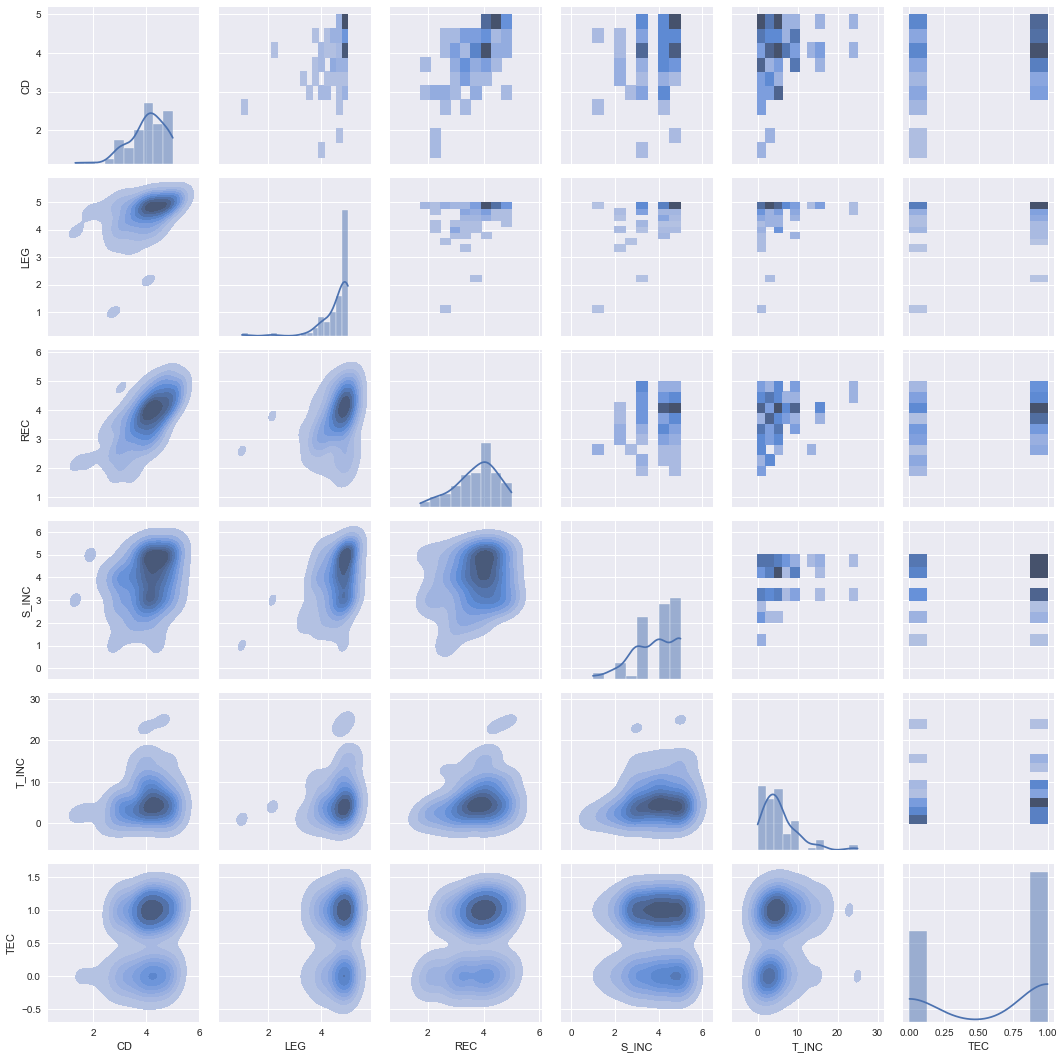

In [23]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

Target looks like classification
Linear Discriminant Analysis training set score: 0.632


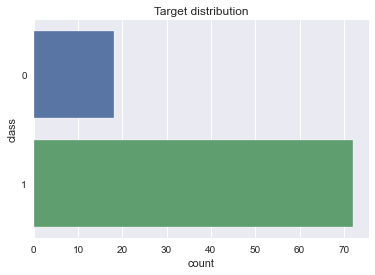

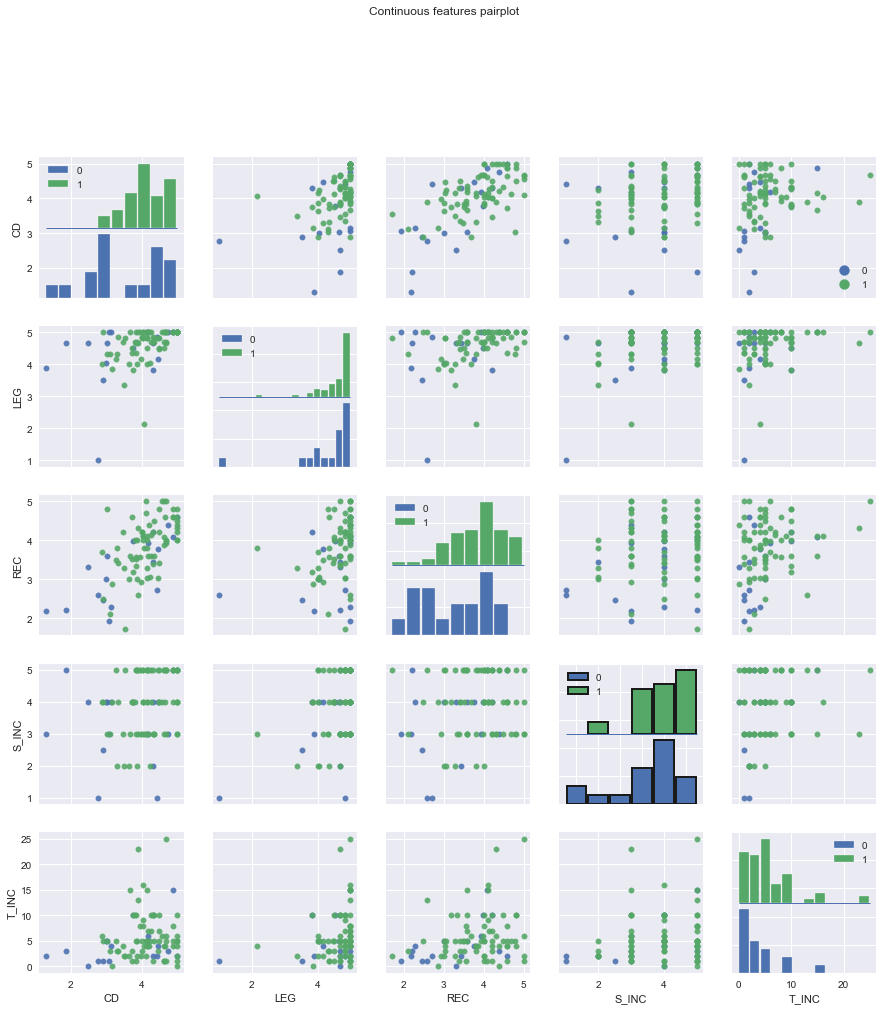

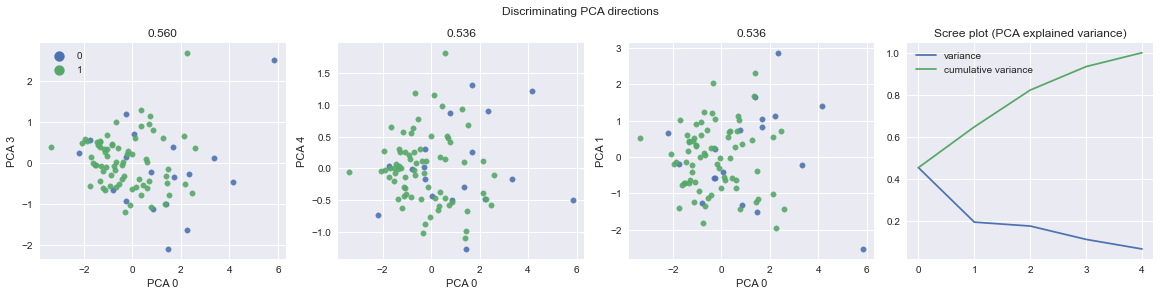

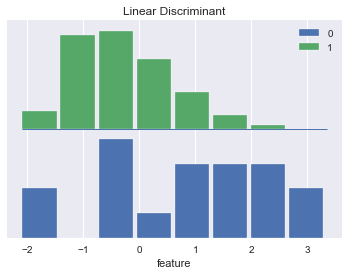

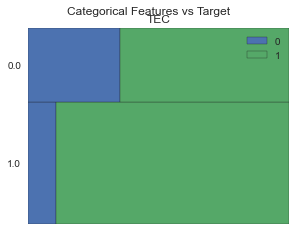

In [24]:
dabl.plot(df, target_col='RESULT')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

y = np.ravel(df[outputs])
X = df[inputs]

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Calling the model
sc = dabl.SimpleClassifier().fit(X_train, y_train)
# Evaluating accuracy score
print("Accuracy score", sc.score(X_test, y_test))

Running DummyClassifier()
accuracy: 0.747 average_precision: 0.253 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.428
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.747 average_precision: 0.253 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.428

Running GaussianNB()
accuracy: 0.258 average_precision: 0.258 roc_auc: 0.613 recall_macro: 0.500 f1_macro: 0.205
Running MultinomialNB()
accuracy: 0.749 average_precision: 0.452 roc_auc: 0.605 recall_macro: 0.547 f1_macro: 0.505
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.749 average_precision: 0.452 roc_auc: 0.605 recall_macro: 0.547 f1_macro: 0.505

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.691 average_precision: 0.359 roc_auc: 0.560 recall_macro: 0.560 f1_macro: 0.541
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.691 average_precision: 0.359 roc_auc: 0.560 recall_macro: 0.560 f1_macro: 0.541

Running Decis

              precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       1.00      0.77      0.87        22

    accuracy                           0.78        23
   macro avg       0.58      0.89      0.58        23
weighted avg       0.96      0.78      0.85        23

[[ 1  0]
 [ 5 17]]


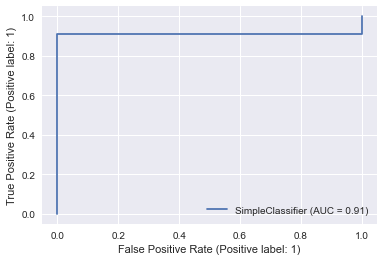

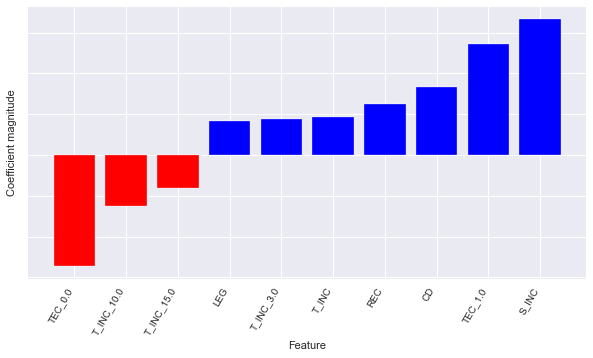

In [26]:
from dabl.models import SimpleClassifier
from dabl.explain import explain

explain(sc, X_test, y_test)

In [35]:
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

Ys = outputs
Xs = inputs
YXs = []

t_size = 0.15 # test size

for k in combinations(Ys, 1):
    Y = np.ravel(df[df.columns.intersection(k)])
    for j in range(1, len(Xs)+1):
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=t_size, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=False), RandomForestClassifier(criterion="gini",
                                                                                         max_depth=1,
                                                                                         min_samples_split=9,
                                                                                         n_estimators=1,
                                                                                         random_state=rng,
                                                                                         bootstrap=False
                                                                                        ),
                                 verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            if score > 0.90:
                best_pipeline = pipe
            #print(k, 'FEATURES:', X.columns, 'GBC', '# of variables:', j, score)
            YXs.append([k, X.columns, 'RFC', j, score])
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=t_size, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=False), GradientBoostingClassifier(
                                                                    #n_estimators=3,
                                                                    #learning_rate=0.01,
                                                                   # max_depth=2,
                                                                   # random_state=1),
                                                                    ),
                                 verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            if score > 0.90:
                best_pipeline = pipe
            #print(k, 'FEATURES:', X.columns, 'GBC', '# of variables:', j, score)
            YXs.append([k, X.columns, 'GBC', j, score])
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=t_size, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=False), LogisticRegression(), verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            #print(k, 'FEATURES:', X.columns, 'LR', '# of variables:', j, score)
            if score > 0.90:
                best_pipeline = pipe
            YXs.append([k, X.columns.values, 'LR', j, score])
        for i in combinations(Xs, j):
            X = df[df.columns.intersection(i)]
            X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=t_size, random_state=42)
            pipe = make_pipeline(StandardScaler(with_mean=False), SVC(C=0.01), verbose=False)
            pipe.fit(X_train, y_train)
            score = pipe.score(X_test, y_test)
            if score > 0.90:
                best_pipeline = pipe
            #print(k, 'FEATURES:', X.columns, 'LR', '# of variables:', j, score)
            YXs.append([k, X.columns.values, 'SVC', j, score])
results = pd.DataFrame(data=YXs, columns=['Y', 'FEATS', 'MODEL', 'number_FEATS', 'SCORE'])
results.dtypes
print(results.describe())

       number_FEATS  SCORE
count        252.00 252.00
mean           3.05   0.83
std            1.18   0.10
min            1.00   0.50
25%            2.00   0.79
50%            3.00   0.86
75%            4.00   0.93
max            6.00   0.93


In [36]:
print(results.head)

<bound method NDFrame.head of              Y                                              FEATS MODEL  \
0    (RESULT,)                      Index(['CD'], dtype='object')   RFC   
1    (RESULT,)                     Index(['LEG'], dtype='object')   RFC   
2    (RESULT,)                     Index(['REC'], dtype='object')   RFC   
3    (RESULT,)                   Index(['S_INC'], dtype='object')   RFC   
4    (RESULT,)                   Index(['T_INC'], dtype='object')   RFC   
..         ...                                                ...   ...   
247  (RESULT,)                      [LEG, REC, S_INC, T_INC, TEC]   SVC   
248  (RESULT,)  Index(['CD', 'LEG', 'REC', 'S_INC', 'T_INC', '...   RFC   
249  (RESULT,)  Index(['CD', 'LEG', 'REC', 'S_INC', 'T_INC', '...   GBC   
250  (RESULT,)                  [CD, LEG, REC, S_INC, T_INC, TEC]    LR   
251  (RESULT,)                  [CD, LEG, REC, S_INC, T_INC, TEC]   SVC   

     number_FEATS  SCORE  
0               1   0.79  
1              

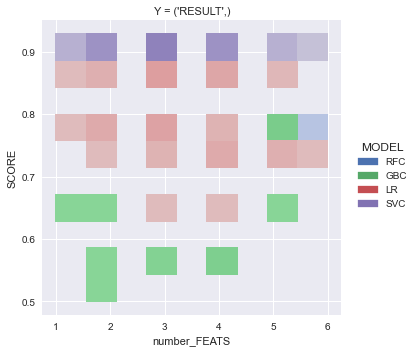

In [37]:
sns.displot(results, y='SCORE', x='number_FEATS', hue='MODEL', legend=True, col='Y')

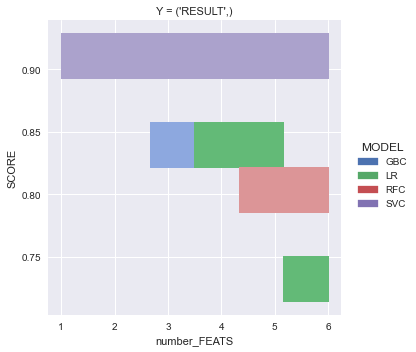

In [38]:
#filtering only with the max score in each combination of Y and Model type
g = results.loc[results.groupby(["Y", "MODEL", 'number_FEATS'])["SCORE"].idxmax()]
g.to_clipboard(sep='\t')
#print(g)
sns.displot(g, y='SCORE', x='number_FEATS', hue='MODEL', legend=True, col='Y')

In [39]:
selected = results[(results["number_FEATS"]>=1) & (results["SCORE"] >= 0.92)]

print(selected)

             Y                              FEATS MODEL  number_FEATS  SCORE
3    (RESULT,)   Index(['S_INC'], dtype='object')   RFC             1   0.93
4    (RESULT,)   Index(['T_INC'], dtype='object')   RFC             1   0.93
5    (RESULT,)     Index(['TEC'], dtype='object')   RFC             1   0.93
9    (RESULT,)   Index(['S_INC'], dtype='object')   GBC             1   0.93
11   (RESULT,)     Index(['TEC'], dtype='object')   GBC             1   0.93
..         ...                                ...   ...           ...    ...
244  (RESULT,)         [CD, LEG, REC, T_INC, TEC]   SVC             5   0.93
245  (RESULT,)       [CD, LEG, S_INC, T_INC, TEC]   SVC             5   0.93
246  (RESULT,)       [CD, REC, S_INC, T_INC, TEC]   SVC             5   0.93
247  (RESULT,)      [LEG, REC, S_INC, T_INC, TEC]   SVC             5   0.93
251  (RESULT,)  [CD, LEG, REC, S_INC, T_INC, TEC]   SVC             6   0.93

[113 rows x 5 columns]


In [40]:
best_pipeline.n_features_in_

6

In [41]:
best_pipeline.steps

[('standardscaler', StandardScaler(with_mean=False)), ('svc', SVC(C=0.01))]

In [42]:
model = dabl.SimpleClassifier().fit(X_train, y_train)


Running DummyClassifier()
accuracy: 0.777 average_precision: 0.223 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.437
=== new best DummyClassifier() (using recall_macro):
accuracy: 0.777 average_precision: 0.223 roc_auc: 0.500 recall_macro: 0.500 f1_macro: 0.437

Running GaussianNB()
accuracy: 0.200 average_precision: 0.214 roc_auc: 0.583 recall_macro: 0.500 f1_macro: 0.167
Running MultinomialNB()
accuracy: 0.776 average_precision: 0.464 roc_auc: 0.643 recall_macro: 0.567 f1_macro: 0.547
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.776 average_precision: 0.464 roc_auc: 0.643 recall_macro: 0.567 f1_macro: 0.547

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.843 average_precision: 0.474 roc_auc: 0.708 recall_macro: 0.708 f1_macro: 0.732
=== new best DecisionTreeClassifier(class_weight='balanced', max_depth=1) (using recall_macro):
accuracy: 0.843 average_precision: 0.474 roc_auc: 0.708 recall_macro: 0.708 f1_macro: 0.732

Running Decis

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.92      0.85      0.88        13

    accuracy                           0.79        14
   macro avg       0.46      0.42      0.44        14
weighted avg       0.85      0.79      0.82        14

[[ 0  1]
 [ 2 11]]
Depth: 1
Number of leaves: 2
Computing partial dependence plots...


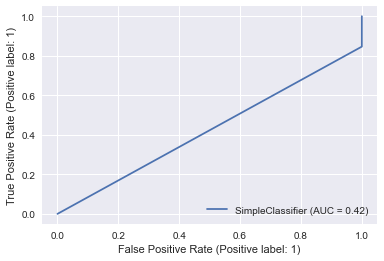

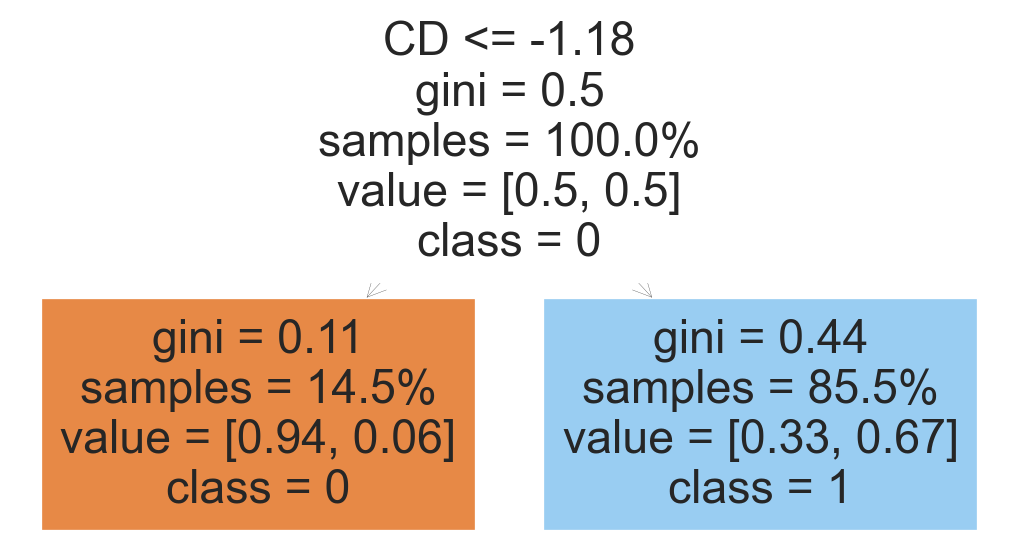

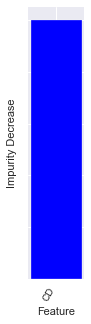

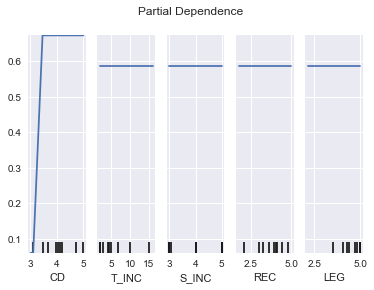

In [43]:
from dabl.explain import explain
explain(model, X_test, y_test)

Automatically created module for IPython interactive environment


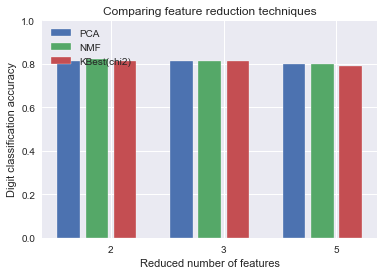

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

print(__doc__)

pipe = Pipeline([
    # the reduce_dim stage is populated by the param_grid
    ('reduce_dim', 'passthrough'),
    ('classify', LinearSVC(dual=True, max_iter=10000))
])

N_FEATURES_OPTIONS = [2, 3, 5]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']

grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)

X = df[list(inputs)]
y = df.RESULT

grid.fit(X, y)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')

plt.show()

In [45]:
import plotly_express as px
fig = px.bar(results, x='number_FEATS', y='SCORE', color='MODEL', hover_name='FEATS')
fig.show()

In [46]:
# Importance of attribute with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(X.columns)
print(model.feature_importances_)

Index(['CD', 'LEG', 'REC', 'S_INC', 'T_INC', 'TEC'], dtype='object')
[0.26594097 0.16122588 0.21147607 0.14202239 0.13590322 0.08343145]


In [47]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=4)
fit = rfe.fit(X, Y)
print("Predictor Variables:", X)
print("Selected Variables: %s" % fit.support_)
print("Attribute Ranking: %s" % fit.ranking_)
print("Number of Best Attributes: %d" % fit.n_features_)

Predictor Variables:      CD  LEG  REC  S_INC  T_INC  TEC
0  3.12 4.33 2.11   3.00   3.00 0.00
1  3.34 4.85 3.41   4.00   3.00 0.00
2  3.74 4.50 3.51   4.00   3.00 1.00
3  4.21 5.00 4.39   5.00   4.00 0.00
4  4.66 5.00 4.59   4.00   4.00 0.00
..  ...  ...  ...    ...    ...  ...
85 4.04 5.00 4.00   5.00   8.00 0.00
86 4.15 4.00 3.28   5.00   5.00 0.00
87 5.00 5.00 4.21   4.00   1.00 1.00
88 4.12 4.85 4.69   3.00   5.00 1.00
89 3.77 4.53 3.98   4.00  10.00 0.00

[90 rows x 6 columns]
Selected Variables: [ True False  True  True False  True]
Attribute Ranking: [1 2 1 1 3 1]
Number of Best Attributes: 4


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        13

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14

[[ 1  0]
 [ 0 13]]
Computing partial dependence plots...


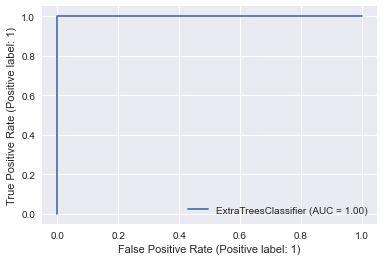

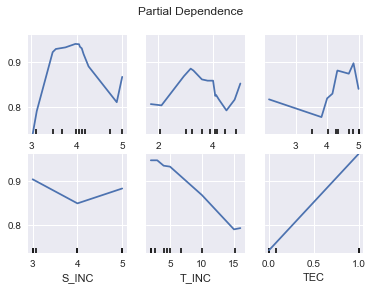

In [48]:
explain(model, X_test, y_test)

Automatically created module for IPython interactive environment


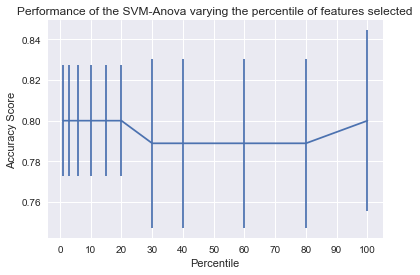

In [49]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# #############################################################################
# Import some data to play with
#X, y = load_iris(return_X_y=True)
columns = inputs
X = df[inputs]
y = df.RESULT

# Add non-informative features
np.random.seed(0)
#X = np.hstack((X, 2 * np.random.random((X.shape[0], 36))))

# #############################################################################
# Create a feature-selection transform, a scaler and an instance of SVM that we
# combine together to have a full-blown estimator
clf = Pipeline([('anova', SelectPercentile(chi2)),
                ('scaler', StandardScaler()),
                ('svc', SVC(gamma="auto"))])

# #############################################################################
# Plot the cross-validation score as a function of percentile of features
score_means = list()
score_stds = list()
percentiles = (1, 3, 6, 10, 15, 20, 30, 40, 60, 80, 100)

for percentile in percentiles:
    clf.set_params(anova__percentile=percentile)
    this_scores = cross_val_score(clf, X, y)
    score_means.append(this_scores.mean())
    score_stds.append(this_scores.std())

plt.errorbar(percentiles, score_means, np.array(score_stds))
plt.title(
    'Performance of the SVM-Anova varying the percentile of features selected')
plt.xticks(np.linspace(0, 100, 11, endpoint=True))
plt.xlabel('Percentile')
plt.ylabel('Accuracy Score')
plt.axis('tight')
plt.show()